### Data Science vs. Business Intelligence / Data Analytics 

* Data analytics/BI focuses on understanding datasets and extracting insights for actionable decisions.
* Data science involves building, cleaning, and organizing datasets, and creating predictive models.
* Data analysts have a more narrow and specialized role, while data scientists ask broader, strategic questions.
*  BI is focused on extracting actionable insights from data and presenting those to stakeholders


In [1]:
! pip install geopandas
! pip install geoplot

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------- -------------------------------- 61.4/323.6 kB 1.6 MB/s eta 0:00:01
   ----------- ---------------------------- 92.2/323.6 kB 1.7 MB/s eta 0:00:01
   ---------------------------------- ----- 276.5/323.6 kB 2.4 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.9 MB ? eta -:--:--
    --------------------------------------- 0.2/15.9 MB 4.6 MB/s eta 0:00:04
   - -------------------------------------- 0.4/15.9 MB 5.3 MB/s eta 0:00:03
   - -------------------------------------- 0.7/15.9 MB 4.8 MB/s eta 0:00:04
   - -------------------------------------- 0.7/15.9 MB 3.8 MB/s eta 0:00:05
   -- ------------------------------------- 1.0/15.9 MB 4.4 MB/s eta 0:00:04
   -- ------------------------------------- 1.2/15.9 MB 4.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.5/15.9 MB 4.2 MB/s eta 0:00:04
  


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\zaraa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------------------------- ------------ 112.6/165.9 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/56.0 kB ? eta -:--:--
     ------- -------------------------------- 10.2/56.0 kB ? eta -:--:--
     ---------------------------------- --- 51.2/56.0 kB 525.1 kB/s eta 0:00:01
     -------------------------------------- 56.0/56.0 kB 419.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/58.9 kB ? eta -:--:--
   ---------------------------------------- 58.9/58.9 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
    --------------------------------------- 0.2/7.8 MB 4.6 MB/s eta 0:00:02
   - -------------------------------------- 0.3/7.8 MB 3.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/7.8 MB 3.4 MB/s eta 0:00:03
   --- ----------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\zaraa\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# install geopandas and geoplot:
# conda install geopandas
# conda install -c conda-forge geoplot
import geopandas
import geoplot
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt


<Axes: xlabel='room_type'>

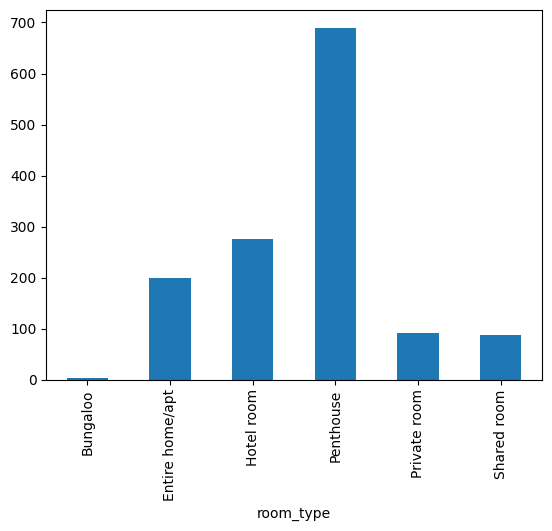

In [3]:
# Lets find the most exensive type of rooms. 

df = pd.read_csv('data/listings_ZD.csv')

dfrm = df.groupby('room_type')['price'].mean()
dfrm.reset_index()
dfrm.plot(kind='bar', x='room_type', y='price')


<Axes: ylabel='room_type'>

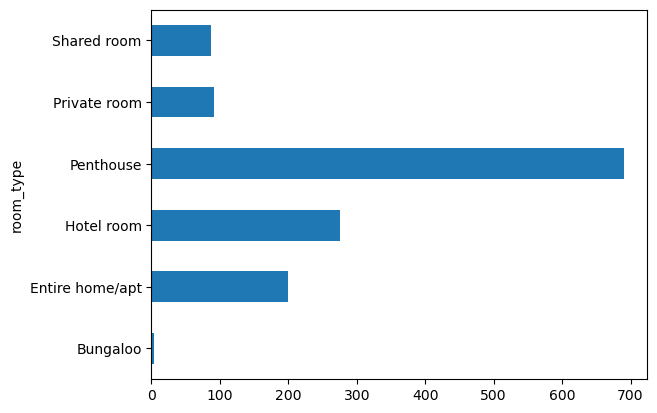

In [30]:
dfrm.plot(kind='barh', x='room_type', y='price')

In [31]:
df = pd.read_csv('data/listings_ZD.csv')

dfrm = df.groupby('room_type')['price'].agg(['mean', 'std', 'count'])
# Get the square root of the sample size
dfrm['sqrt_count'] = np.sqrt(dfrm['count'])

# get the standard devation of the mean
dfrm['std_of_mean'] = dfrm['std'] / dfrm['sqrt_count']

# two stds below the mean
dfrm['lower_bound'] = dfrm['mean'] - (2 *dfrm['std_of_mean'])

# two stds above the mean
dfrm['upper_bound'] = dfrm['mean'] + (2 *dfrm['std_of_mean'])
dfrm = dfrm.round()
dfrm



,mean,std,count,sqrt_count,std_of_mean,lower_bound,upper_bound
room_type,,,,,,,
Bungaloo,4.0,NaN,1,1.0,NaN,NaN,NaN
Entire home/apt,199.0,338.0,23998,155.0,2.0,195.0,204.0
Hotel room,275.0,302.0,398,20.0,15.0,245.0,305.0
Penthouse,690.0,NaN,1,1.0,NaN,NaN,NaN
Private room,91.0,282.0,21144,145.0,2.0,88.0,95.0
Shared room,87.0,354.0,987,31.0,11.0,65.0,110.0


In [2]:
# Import listings
df=pd.read_csv('data/listings.csv')

# Basic Analytics

### Basic Inference

1. What do mean, standard deviation and standard deviation of the mean, ... mean(?)

#### Types of Mean
1.  arithmetic:  $\overline{a}_{\mathrm{ar}} = { \sum_{i=1}^{N} a_i \over N }$
2.  geometric:  $\overline{a}_{\mathrm{geo}} = \left( { \prod_{i=1}^{N} a_i  }\right)^{1 \over N}$ 
3.  harmonic:  $ { 1\over \overline{a}_{\mathrm{har}} } =  { \sum_{i=1}^{N} { 1 \over a_i} \over N } $   

(array([  22.,  186.,  820., 1877., 2792., 2550., 1286.,  390.,   67.,
          10.]),
 array([-3.55258056, -2.80786711, -2.06315366, -1.31844021, -0.57372676,
         0.17098669,  0.91570014,  1.66041359,  2.40512704,  3.14984049,
         3.89455394]),
 <BarContainer object of 10 artists>)

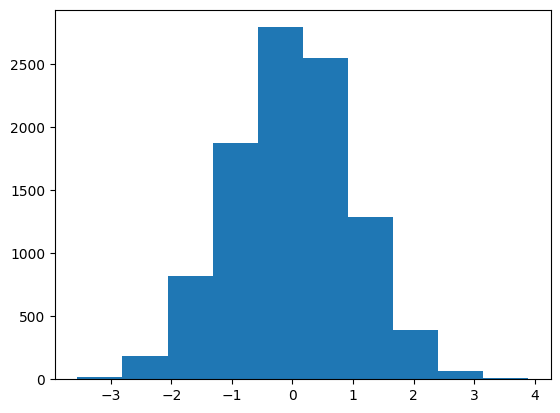

In [4]:
# Standard deviation of the mean 
# If we take an N sized sample, what will it look like?

# this generates a sample of normal data to serve as out population
mu, sigma = 0, 1 # mean and standard deviation
population = np.random.normal(mu, sigma, 10000)
plt.hist(population)

In [5]:
# repeatedly sample
import random 
sqrt_N = 10
N = sqrt_N*sqrt_N
mean_list = []
stdev_list = []


for i in range(1,1000):
    random.shuffle(population)
    sample = population[:N]
    # sample = np.random.normal(mu, sigma, N)
    mean_list.append(sample.mean())
    stdev_list.append(sample.std())


<Axes: ylabel='Frequency'>

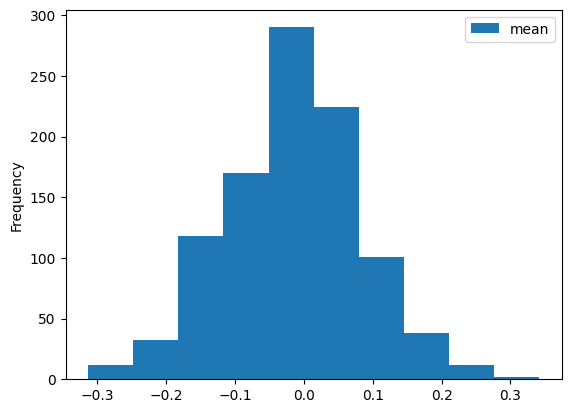

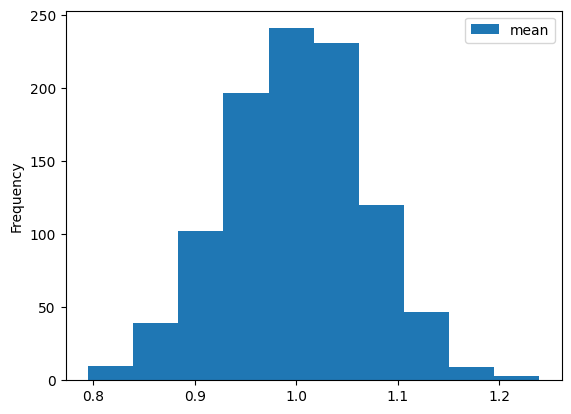

In [6]:
dfm = pd.DataFrame(mean_list, columns=['mean'])
dfm.plot.hist()

dfstd = pd.DataFrame(stdev_list, columns=['mean'])
dfstd.plot.hist()

#### sample statistics

* mean of the sample mean
$$
\mu_\mathrm{sm} \approx \mu_\mathrm{pop}
$$
* std of the mean:
$$
\sigma_\mathrm{sm}  \approx { \sigma_\mathrm{pop} \over \sqrt{N} } 
$$

In [7]:
np.mean(mean_list), np.std(mean_list) , 1/np.std(mean_list)

(-0.015581086564847241, 0.09807524596176984, 10.196252787271158)

# Tableau Prep

### AirBnB Buroughs Map

C:\Users\zaraa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


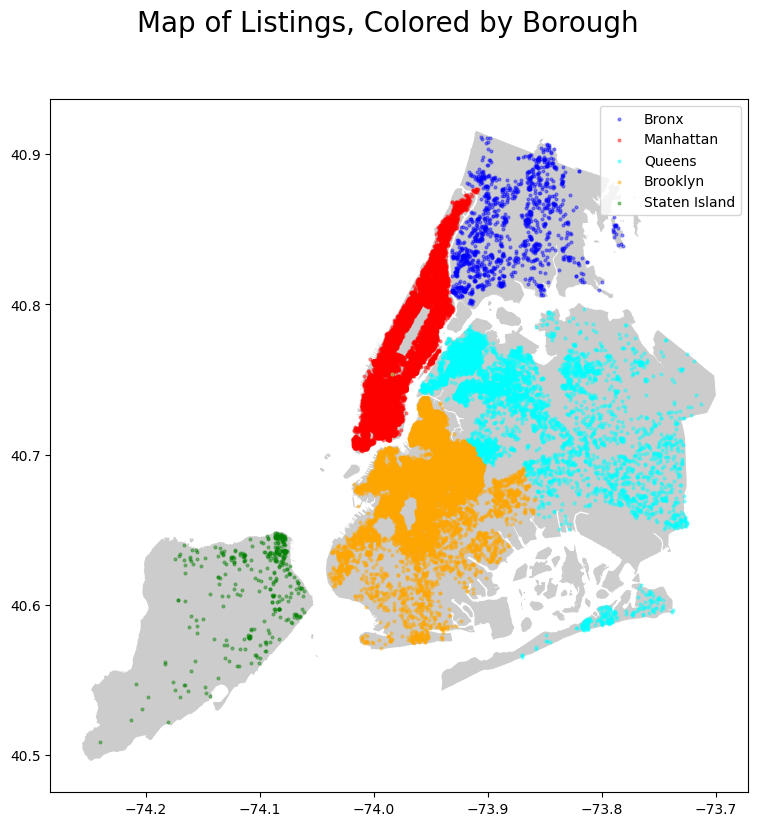

In [8]:
#  We are going to make a map of all of the AirBNB properties. Later we do this in Tableau

cols_to_keep=['longitude','latitude']

crs={'init':'epsg:4326'}

boroughs = geopandas.read_file(geoplot.datasets.get_path('nyc_boroughs'))
geom = geopandas.points_from_xy(df["longitude"], df["latitude"])
geo_df=geopandas.GeoDataFrame(df, crs=crs,geometry=geom)

fig,ax=plt.subplots(figsize=(9,9))
fig.suptitle('Map of Listings, Colored by Borough', fontsize=20)
boroughs.plot(ax=ax,alpha=0.4,color="grey")
geo_df[geo_df['neighbourhood_group']=="Bronx"].plot(ax=ax,markersize=4, alpha=0.4,color="blue", label="Bronx")
geo_df[geo_df['neighbourhood_group']=="Manhattan"].plot(ax=ax,markersize=4, alpha=0.4,color="red", label="Manhattan")
geo_df[geo_df['neighbourhood_group']=="Queens"].plot(ax=ax,markersize=4, alpha=0.4,color="aqua", label="Queens")
geo_df[geo_df['neighbourhood_group']=="Brooklyn"].plot(ax=ax,markersize=4, alpha=0.4,color="orange", label="Brooklyn")
geo_df[geo_df['neighbourhood_group']=="Staten Island"].plot(ax=ax,markersize=4, alpha=0.4,color="green", label="Staten Island")
plt.legend()


### Histograms


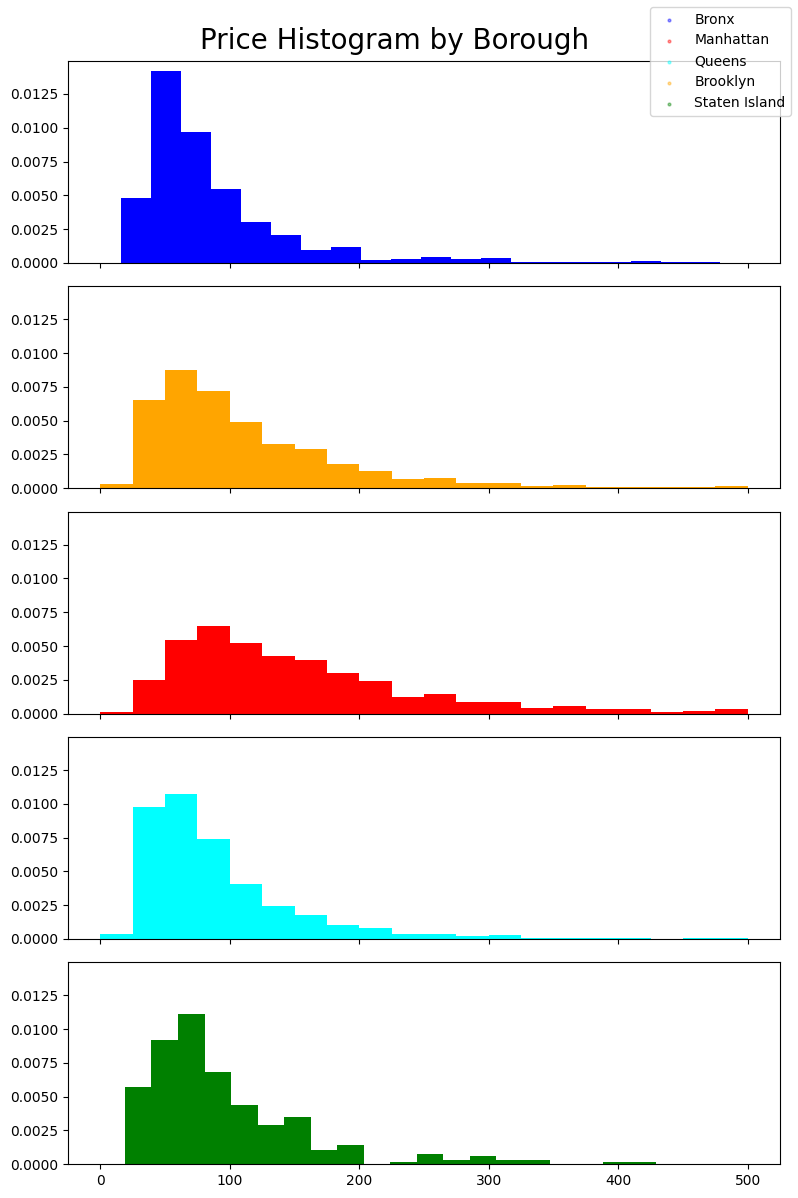

In [10]:
# Now we make a set of price histograms

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

n_bins = 20

# price data to make histograms with

price_filter = df['price']<=500

neighborhood_filter = df['neighbourhood_group']=="Bronx"
bronx = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Brooklyn"
brooklyn = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Manhattan"
manhattan = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Queens"
queens = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Staten Island"
staten = df[neighborhood_filter & price_filter].price

fig, axs = plt.subplots(5, 1, sharey=True, sharex=True, tight_layout=True)

# sefault figsize is  6.4 X 4.8 inches.  we need someting taller
fig.set_size_inches(8, 12.0)

fig.suptitle('Price Histogram by Borough', fontsize=20)
# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(bronx, bins=n_bins, color = 'blue', density=True)
axs[1].hist(brooklyn, bins=n_bins, color = 'orange', density=True)
axs[2].hist(manhattan, bins=n_bins, color = 'red', density=True)
axs[3].hist(queens, bins=n_bins, color = 'aqua', density=True)
axs[4].hist(staten, bins=n_bins, color = 'green', density=True)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')


In [ ]:
# df.plot(kind='hist', x='price', subplots=True )

# cheap[['price', 'neighbourhood_group']].plot(kind='hist', subplots=True )

array([<Axes: title={'center': 'Bronx'}>,
       <Axes: title={'center': 'Brooklyn'}>,
       <Axes: title={'center': 'Manhattan'}>,
       <Axes: title={'center': 'Queens'}>,
       <Axes: title={'center': 'Staten Island'}>, <Axes: >, <Axes: >],
      dtype=object)

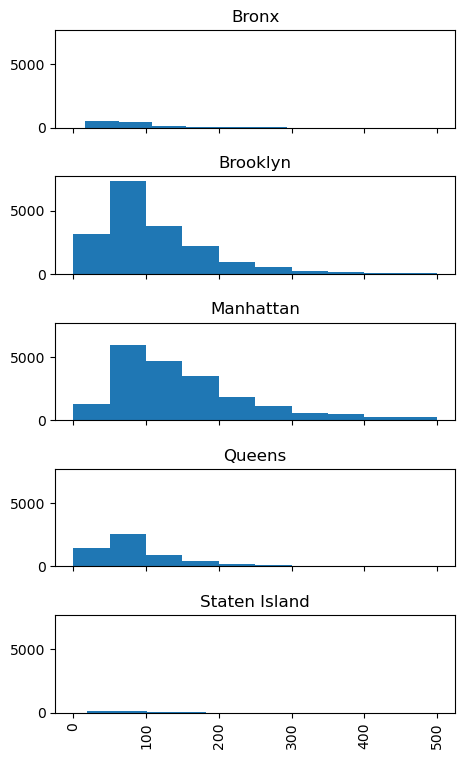

In [18]:
cheap_df = df[df.price <= 500]
cheap_df.hist(
    column='price', 
    by='neighbourhood_group', 
    figsize=(5,13), 
    layout=(7,1), 
    sharex=True, 
    sharey=True
    )


### Box and Whisker

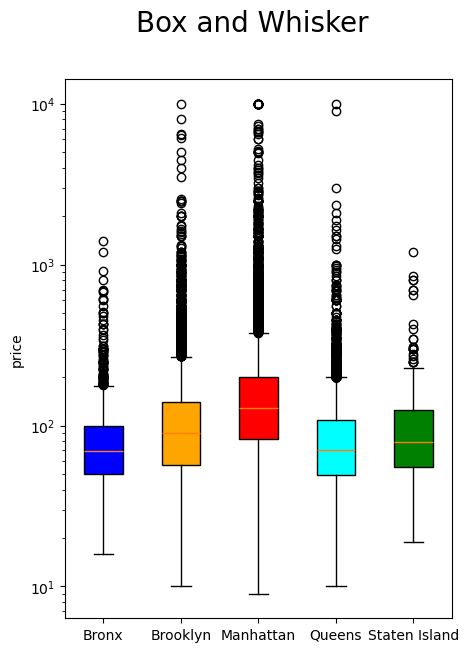

In [19]:
# Finally we make some "Box and Whisker"  Plots, using IQR for the boxes and whiskers

price_filter = (df['price']<=10000) &  (df['price']>=1)

neighborhood_filter = df['neighbourhood_group']=="Bronx"
bronx = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Brooklyn"
brooklyn = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Manhattan"
manhattan = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Queens"
queens = df[neighborhood_filter & price_filter].price

neighborhood_filter = df['neighbourhood_group']=="Staten Island"
staten = df[neighborhood_filter & price_filter].price

box_weights = [bronx,brooklyn, manhattan, queens, staten]
labels = ['Bronx','Brooklyn', 'Manhattan', 'Queens', 'Staten Island']
colors = ['blue', 'orange', 'red', 'aqua', 'green']
fig, ax = plt.subplots()

fig.set_size_inches(5, 7.0)

fig.suptitle('Box and Whisker', fontsize=20)
ax.set_ylabel('price')
ax.set_yscale('log')
bplot = ax.boxplot(box_weights,
                   patch_artist=True)  # will be used to label x-ticks
ax.set_xticklabels(labels) 
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


In [ ]:
# in tableau, be sure to copy price and disaggregate it to match this plot